# Backpropagation

Here is a quick representation of the backpropagation algorithm for the simple two node network.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

##  Steps to backpropagation

We outlined 4 steps to perform backpropagation,

   1. Choose random initial weights.
   2. Fix input at desired value, and calculate output.
   3. Update the weights.
   4. Repeat steps 2 & 3 many times.

Let's now implement these steps.

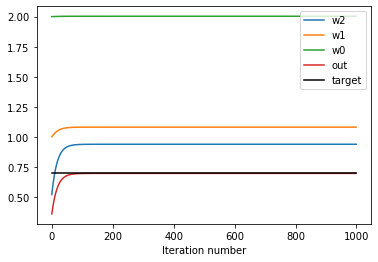

In [7]:
s0 = 2                          # Define the input,
target = 0.7                    # ... and the target output.

w0 = 2                          # Choose initial values for the weights.
w1 = 1
w2 = 0.5

alpha = 0.1                     # Set the learning constant.

def sigmoid(x):
    return 1/(1+np.exp(-x))     # Define the sigmoid anonymous function.

results = np.zeros([1000,4])    # Define a variable to hold the results of each iteration.    
for k in range(1000):           # For 1000 iteractions,
    
    #Step 2. Calculate feedforward solution to get output.
    x1 = w0*s0                  # ... activity of first neuron,
    s1 = sigmoid(x1)            # ... output of first neuron,
    x2 = w1*s1                  # ... activity of second neuron,
    s2 = sigmoid(x2)            # ... output of second neuron,
    out= w2*s2                  # Output of neural network.
    
    #Step 3. Update the weights.
    w2 = w2 - alpha*(out-target)*s2
    w1 = w1 - alpha*(out-target)*(w2*s2*(1-s2)*s1)
    w0 = w0 - alpha*(out-target)*(w2*s2*(1-s2)*w1)*(s1*(1-s1)*s0)
    
    # Save the results of this step! --------------------------------------
    results[k,:] = [w2,w1,w0,  out]
    # Here we save the 3 weights, the neural network output.

plt.clf()
plt.plot(results[:,0], label='w2')
plt.plot(results[:,1], label='w1')
plt.plot(results[:,2], label='w0')
plt.plot(results[:,3], label='out')
plt.plot(np.arange(1000), 1000*[target], 'k', label='target')  #... and plot the *target*.
plt.legend() #Include a legend,
plt.xlabel('Iteration number');         #... and axis label.